# Pyuvvis Basic Tutorial: Part 1- TimeSpectra

### Objective

Introduce `TimeSpectra` and its basic features, including:

   - normalizing/referencing data (e.g. Absorbance vs. Transmitance)
    
   - changing spectral units
    
   - converting between interval and datetime representations
   
   - basic arithmetic/pandas operations
   
See [part 2](http://nbviewer.ipython.org/github/hugadams/skspec/blob/master/examples/Notebooks/tutorial_2.ipynb?create=1) for `TimeSpectra` construction, I/O, slicing and advanced pandas operations.

### Environment Setup

Configure notebook style (see NBCONFIG.ipynb), add imports and paths.  The **%run** magic used below <font color='red'>**requires IPython 2.0 or higher.**</font>

In [1]:
%run NBCONFIG.ipynb

Populating the interactive namespace from numpy and matplotlib
['dti', 'd', 'h', 'm', 'us', 's', 'ms', 'intvl', 'ns']


### Importing Test Data

`skspec` comes prepackaged with several test datasets; see the [test data tutorial](http://nbviewer.ipython.org/github/hugadams/skspec/blob/master/examples/Notebooks/testdata.ipynb?create=1) for explanations of each set.  We will `aunps_glass()`, which is the spectral reflectance of a glass surface as it's coated with a monolayer of gold nanoparticles over time.

In [2]:
from skspec.data import aunps_glass

ts = aunps_glass()
ts

*AuNPs Glass (good)*	[timestamp X nanometers]	Iunit: Counts (photons)

Baseline: None	Reference: Found	Normalization: None

        2014-05-22 15:38:23  2014-05-22 15:38:26  2014-05-22 15:38:30  \
430.10           257.315595           257.462298           257.216689   
430.47           267.776463           267.823164           267.707553   
430.85           278.697354           278.704053           278.718440   
431.22           290.288222           290.344919           290.219305   
431.59           302.609089           302.635784           302.620169   
431.96           314.499957           314.616650           314.641033   
432.33           327.720825           327.857516           327.931897   
432.70           340.491693           340.758382           340.682762   
433.08           355.492584           355.819271           355.763649   
433.45           369.703452           370.100137           370.154513   
433.82           384.024319           384.261002           384.225378   
434.19           399.695187           400.011868           400.016242   
434.56           415.366055           415.592734           415.587106   
434.93           430.516923           430.543600           430.647970   
435.30           445.457791           445.534465           445.768834   
435.68           462.498682           462.435355           462.779722   
436.05           479.079550           479.136220           479.370586   
436.42           495.810417           495.737086           496.031451   
436.79           511.271285           511.087952           511.582315   
437.16           527.992153           527.788818           528.323179   
437.53           545.853021           545.679684           546.284043   
437.90           563.923889           563.790549           564.294907   
438.27           581.584756           581.481415           581.875772   
438.64           600.155624           600.162281           600.346636   
439.01           617.616492           617.573147           617.797500   
439.38           633.597360           633.494012           633.718364   
439.75           649.098227           648.834878           648.999229   
440.13           666.689119           666.505767           666.630116   
440.50           683.479986           683.346633           683.530980   
440.87           697.580854           697.167499           697.341845   
...                     ...                  ...                  ...   
669.87           187.957941           188.223341           187.406734   
670.21           185.978739           186.254137           185.567528   
670.55           184.249536           184.544933           183.788322   
670.89           182.770334           182.985728           182.319116   
671.23           181.051131           181.156524           180.619911   
671.57           179.541928           179.527319           179.120705   
671.91           177.932726           177.878115           177.441499   
672.25           176.223523           176.228910           175.832293   
672.58           174.564297           174.529683           174.213064   
672.92           172.775095           172.700478           172.503858   
673.26           171.265892           171.101274           170.874652   
673.60           169.806689           169.562069           169.315446   
673.94           168.317487           168.032865           167.856241   
674.28           166.958284           166.683661           166.477035   
674.62           165.489082           165.274456           165.167829   
674.96           163.929879           163.725252           163.538623   
675.30           162.560677           162.246047           162.109417   
675.64           161.131474           160.806843           160.580211   
675.97           159.492248           159.317615           159.080982   
676.31           157.923045           157.708411           157.521776   
676.65           156.393843           156.229206           155.962570   
676.99 

A `timespectra` is a pandas Dataframe with a **DateTime Index** along the colum axis, and **Spectral Data** along the rows.  

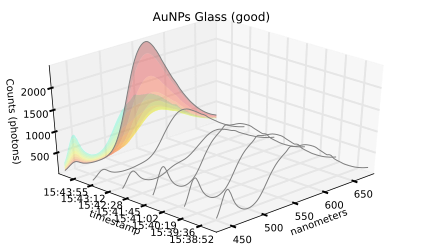

In [3]:
ts.plot(kind='spec3d');

### Spectral and Temporal Conversion

This previous plot shows the dataset, colored by time.  *What if we wanted to change the spectral dimension, and maybe represent the data as an interval?*  First, let's see what types of spectral units and time intervals are supported:

In [4]:
ts.specunits(pprint=True)
ts.varunits(pprint=True)


Key 	Description
-------------------

None 	No unit
cm 	centimeters
cm-1 	inverse centimeters
ev 	electron volts
f 	hertz
k 	inverse meters
m 	meters
nm 	nanometers
um 	microns
um-1 	inverse microns
w 	radians per second



Key 	Description
-------------------

None 	No unit
d 	days
dti 	timestamp
h 	hours
intvl 	interval
m 	minutes
ms 	milliseconds
ns 	nanoseconds
s 	seconds
us 	microseconds




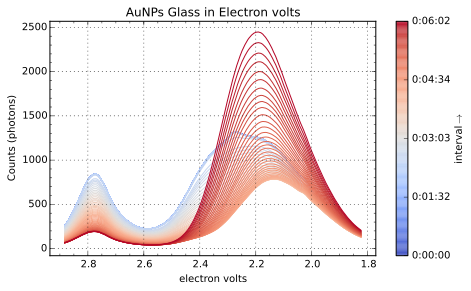

In [16]:
t2 = ts.as_varunit('intvl')
t2.specunit = 'ev'
t2.plot(cbar=True, 
        title='AuNPs Glass in Electron volts');

In [ ]:
from skspec.correlation import Corr2d
from skspec.data import solvent_evap

Corr2d(solvent_evap()).async_codist.plot(contours=128)

(<matplotlib.axes._subplots.AxesSubplot at 0x81ea410>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb0e6690>)

By default, `as_interval()` returns time deltas, but we could also show this in seconds for example.  Let's look at how the area under the curves changes with time.

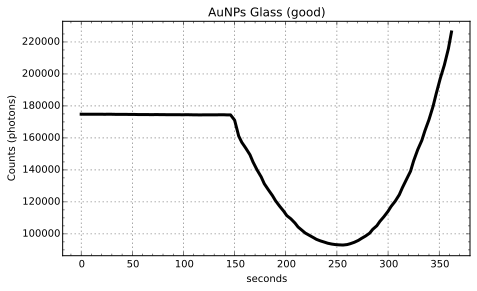

In [6]:
ts.as_varunit('s').plot(kind='area');

#### API for various units

`Spectra` object support the following three unit types:
 
   - **iunit**: Data intensity unit type ('Absorbance' vs. 'Transmittance' vs. 'Raw')
   - **specunit (index/row label)**: Spectral unit (wavelength, wavenumber etc...)
   - **varunit (column label)**: Variation/perturbation unit (time, temperature, pressure etc...)
   
While the most common perturbation variable in our work is time, a more general framework should not rely on explicit declarations of time.  

 <font color='blue'>**For each of these three units, the following API is supported**</font>:
   - `xunit`: Return the current unit.
       - e.g.  `ts.specunit`
   - `full_xunit`: Return the full name of spectral unit
       - e.g. `ts.full_specunit`
   - `list_xunits`: Formatted printout of all available units.
       - e.g. `ts.list_specunits()`
   - `as_xunit`: Return a new Spectra object in that desired unit
       - e.g. `ts_new = ts.as_specunit('nm')`
    
The API also supports unit setting (e.g. `ts.specunit = 'cm-1'`); however, setting the full specunit (e.g. `ts.full_specunit = inverse centimeters`) is not supported.

The `TimeSpectra` extends this API to support interval units.  For example, `ts.as_interval("s")`.  

#### Normalization and Intensity Representations

So far, we have only looked at the raw data.  However, spectrsocopy almost always deals with normalized data.  For example, the **absorbance** is defined as:

$A(\lambda) = -\log_{10} \left[ \frac{S(\lambda)  - B(\lambda) }{R(\lambda)  - B(\lambda) }\right] $

Where **S** is the spectra, **R** is a reference spectrum and **B** is a baseline spectra.  Because baseline and reference operations are SO common, `skspec` tries to make juggling them very intuitive.

Let's check out the supported normalizations:

In [7]:
ts.norms(pprint=True)


Key 	Description
-------------------

None 	No Normalization
%t 	(%)Transmittance
a 	Absorbance (base 10)
a(ln) 	Absorbance (base e)
r 	Inverse Transmittance (1/T)
t 	Transmittance




Note the **Inverse Transmittance**.  This merely means dividing the baseline-subtracted data by a single curve (eg. it's $A(\lambda)$ without the $-log_{10}$).   Let's take a look at the absorbance using a dataset of AuNPs in $H_20$.  We will plot the dataset, its reference and its baseline (which has been pre-assigned) in a multiplot using `splot`, as simple wrapper to matplotlib's `plt.subplots()`.

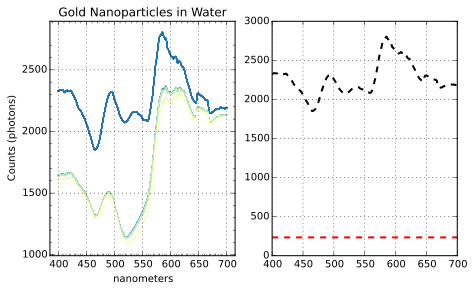

In [8]:
from skspec.data import aunps_water
from skspec.plotting import splot

ts_water = aunps_water().ix[400.:700.] #Focus on visible wavelengths 
ax1, ax2 = splot(1,2)

ts_water.plot(ax=ax1)
ts_water.baseline.plot(ax = ax2, color='r', ls='--')
ts_water.reference.plot(ax = ax2, color='black', ls='--');

We see that the baseline for this dataset is set to $y=234 counts$ and the reference is actually the first curve in the dataset.  **Before using normalized data, don't to subtract the baseline!**.  The baseline can be subtracted or added back at any time through the `ts.sub_base()` and `ts.add_base()` methods.  The plot below shows the characteristic surface plasmon resonance peak of gold nanoparticles before and after proteins bind to them.

CRITICAL:skspec.core.spectra:Subtracting baseline, but may not have all: elements being equal.  Fix index


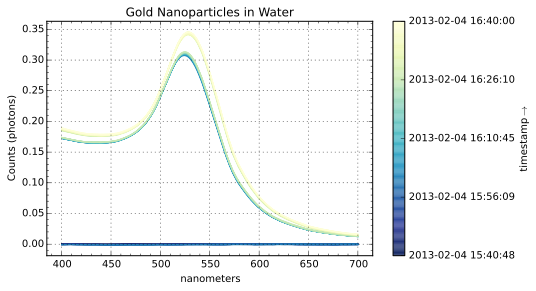

In [9]:
ts_water.sub_base()
ts_water.as_norm('a').plot(cbar=True, colormap='hot_r');

#### Changing the baseline/reference

Baselines and references accept a variety of input types including:

- `Column Index` : **ts.set_baseline(50)**
       Integers are automatically interpreted as column indicies.

- `Column Name` : **ts.set_baseline('2013-02-04 15:40:48')**
       Strings must be valid column names.
       
- `Array` : **ts.set_baseline(np.random.randn( ts.shape[0] )**
       Array must have the SAME length as ts.index
       
       
For example, let's pass some guassian noise as our baseline, then subtract the baseline resulting in really noisy data.

CRITICAL:skspec.core.spectra:Subtracting baseline, but may not have all: elements being equal.  Fix index


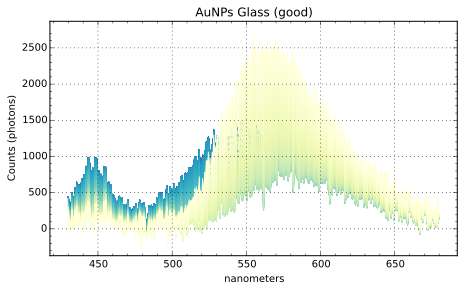

In [10]:
AMP = 100 #noise amplitude
ts.baseline = AMP * np.random.randn(ts.shape[0])
ts.sub_base()
ts.plot();

**However, this operation is fully reversible!**

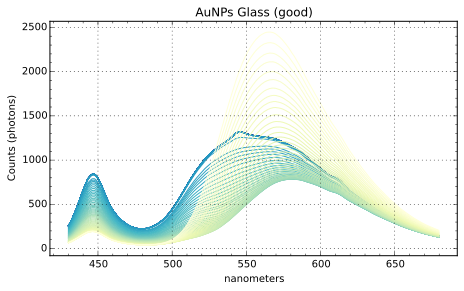

In [11]:
ts.add_base()
ts.plot();

### Arithmetic Operations 

The timespectra should behave like a dataframe, so basic [pandas](http://pandas.pydata.org/) operations should just work.  Note that this behavior is not standard, so not every single operation is likely to work.   <font color='blue'>**At any time, the underlying dataframe may be access through the attribute,**</font> `ts._df()`.

As an example of an arithmetic operation, let's square the TimeSpectra...

In [12]:
tsquared = ts**2
tsquared.plot(title='ts squared',
              cbar = True,
              colormap='spectral');

or look at the column-wise mean... ( <font color='red'>some operations that return will lose some skspec of the default plot settings</font>)

In [13]:
ts.mean().plot(title='$\mu$ column-wise average')
plt.ylabel('Average counts')
plt.xlabel('Timestamp');

One very important method is `ts.apply()` which allows the user to pass an arbitrary curve function row or columnwise.  As a contrived example, consider a function that randomly adds noise to a curve with a 20% chance.

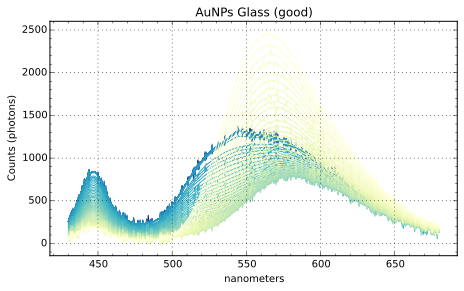

In [14]:
def random_noise(curve):
    if randint(1,6) == 5:     #20% chance of choosing 5
        curve = curve + 25 * np.random.randn(len(curve))
    return curve

ts_noisy = ts.apply(random_noise, axis=1)
ts_noisy.plot();

`apply` also works on functions that will return a single `Spectrum`.  For example, if we define a function that for each time curve, we return the quotient of its min and max, a `Spectrum` is returned.  This is equivalent to a pandas Series, except it retains certain metadata about the `Spectra` such as the `specunit` and baseline.

In [15]:
def foo(series):
    return series.min() /series.max()

spectrum = ts.apply(foo)
spectrum.plot(ylabel='Quotient', title='Spectrum: Quotient vs. time')
print type(spectrum)

# Print out first 5 values
spectrum[0:5];

<class 'skspec.core.spectra.Spectrum'>


See [part2](http://nbviewer.ipython.org/github/hugadams/skspec/blob/master/examples/Notebooks/tutorial_2.ipynb?create=1) for slicing, IO and more advanced pandas functionality.  For working with multiple TimeSpectra at once, jump to the [SpecStack tutorial](http://nbviewer.ipython.org/github/hugadams/skspec/blob/master/examples/Notebooks/testdata.ipynb?create=1).

<hr>
<br>


<div style="float:left; \">
    <img src="https://avatars0.githubusercontent.com/u/1972276?s=460" 
 align=left; text-align:center; style="float:left; margin-left: 5px; margin-top: -25px; width:150px; height:150px" /> 
</div>

<div style="float:left; \"><a href="https://github.com/hugadams">
    <img src="https://assets-cdn.github.com/images/modules/logos_page/GitHub-Mark.png" 
 align=left; text-align:center; style="float:left; margin-left: 25px; margin-top: -25px; width:75px; height:75px" /> 
</div>


<div style="float:left; \"><a href="https://twitter.com/hughesadam87">
    <img src="http://paymentmagnates.com/wp-content/uploads/2014/04/twitter-icon.png" 
 align=left; text-align:center; style="float:left; margin-left: 25px; margin-top: -25px; width:75px; height:75px" /> 
</div>

<div style="float:left; \"><a href="https://www.researchgate.net/profile/Adam_Hughes2?ev=hdr_xprf">
    <img src="http://www.txhughes.com/images/button-researchgate.png" 
 align=left; text-align:center; style="float:left; margin-left: -175px; margin-top: 55px; width:75px; height:75px" /> 
</div>

<div style="float:left; \"><a href="https://www.linkedin.com/profile/view?id=121484744&trk=nav_responsive_tab_profile_picg">
    <img src="http://smallbusinessesdoitbetter.com/wordpress/wp-content/uploads/li.png" 
 align=left; text-align:center; style="float:left; margin-left: -75px; margin-top: 55px; width:75px; height:75px" /> 
</div>

<div style="float:center; \"><a href="http://www.gwu.edu/">
    <img src="https://raw.githubusercontent.com/hugadams/pyparty/master/pyparty/data/gwu.png" 
 align=center style="float:center; margin-right: 30px; margin-top: -35px; width:335px; height:180px" />
</div>


<h4 style="margin-top:0px;"> This notebook is free for redistribution. If citing, please reference as: </h4>
- *Hughes, A. (2012). [A Computational Framework for Plasmonic Nanobiosensing](https://www.researchgate.net/publication/236672995_A_Computational_Framework_for_Plasmonic_Nanobiosensing).  Python in Science Conference [SCIPY].* 


<h3 style="margin-top:30px;"> Questions or Feedback? </h3>

* hugadams@gwmail.gwu.edu 
* twitter:  <a href="https://twitter.com/hughesadam87" target="_blank">@hughesadam87</a>
* <a href="http://www.gwu.edu/~condmat/CME/reeves.html" target="_blank">Mark Reeves Biophysics Group</a>




<h3 style="margin-top:30px;"> References: </h3>

* [1] : **REF 1**
* [2] : **REF 2**





<h3 style="margin-top:30px;"> Related: </h3>

   * <a href="https://github.com/hugadams/pyparty" target="_blank">skspec: Exploratory Spectral Data Analysis</a>
   * <a href="https://github.com/hugadams/pyparty" target="_blank">pyparty: Image Analysis of Particles</a>
   * <a href="http://lorenabarba.com/" target="_blank">Lorena A. Barba (GWU Engineering)</a>
   * <a href="http://www.youtube.com/watch?v=W7RgkHM-B60" target="_blank">xray: extended arrays for scientific datasets</a>



<h3 style="margin-top:30px;">Notebook styling ideas:</h3>

* <a href="http://blog.louic.nl/?p=683" target="_blank">Louic's web blog</a>
* <a href="https://plot.ly/feed" target="_blank">Plotly</a>
* <a href="http://damon-is-a-geek.com/publication-ready-the-first-time-beautiful-reproducible-plots-with-matplotlib.html" target="_blank">Publication-ready the first time: Beautiful, reproducible plots with Matplotlib</a>

<br>
<hr>